In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi
from scipy.optimize import leastsq
from numpy.fft import *
%matplotlib notebook

In [94]:
N=10000;Nc=4;Nf=4;Nb=4;L=int(np.sqrt(Nc))
beta=100;
mu=0;
t=1
n=200
matsubara=(2*np.linspace(-n,n,2*n+1)+1)*np.pi/beta

In [95]:
KX=np.linspace(-pi,pi,L+1);KX=np.delete(KX,0);dK=KX[1]-KX[0];min_K=np.min(KX);max_K=np.max(KX)
KY=np.linspace(-pi,pi,L+1);KY=np.delete(KY,0)
KX,KY=np.meshgrid(KX,KY)

In [96]:
kx=np.linspace(-2*pi,2*pi,2*int(np.sqrt(N))+1);kx=np.delete(kx,0);min_k=np.min(kx);max_k=np.max(kx)
ky=np.linspace(-2*pi,2*pi,2*int(np.sqrt(N))+1);ky=np.delete(ky,0)
kx,ky=np.meshgrid(kx,ky)
E_k=2*t*(np.cos(kx)+np.cos(ky))


In [97]:
G0_k=np.empty((matsubara.size,kx.shape[0],kx.shape[1]),dtype=np.complex128)
for i in xrange(n):
    G0_k[i,:,:]=(1j*matsubara[i]+mu-E_k)**(-1)

In [98]:
G0_K=np.empty((matsubara.size,KX.shape[0],KX.shape[1]),dtype=np.complex128)
E_K=np.empty((KX.shape[0],KX.shape[1]))
for i in xrange(L):
    for j in xrange(L):  
            indexes=((kx>(KX[i,j]-dK/2.))&(kx<(KX[i,j]+dK/2.)))&((ky>(KY[i,j]-dK/2.))&(ky<(KY[i,j]+dK/2.)))   
            G0_K[:,i,j]=Nc*np.sum(G0_k[:,indexes],axis=1)/N
            E_K[i,j]=Nc*np.sum(E_k[indexes])/N
        

<IPython.core.display.Javascript object>


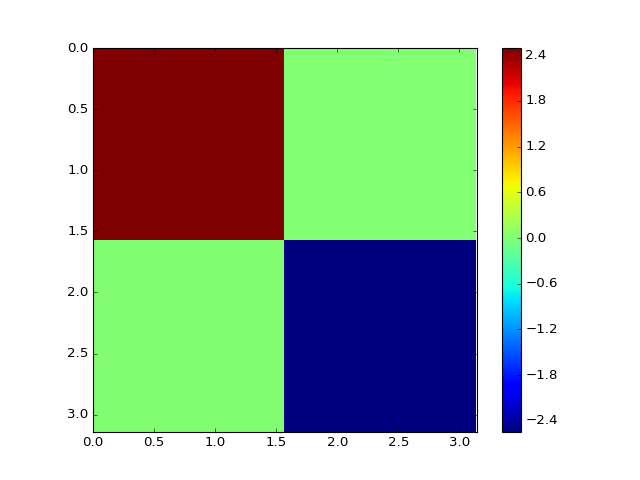

In [99]:
plt.figure()
plt.imshow(E_K,interpolation='None', extent=(min_K,max_K, max_K, min_K))
plt.colorbar()

In [72]:
np.max(E_K)/np.max(E_k)*t

0.90046442930940152

<IPython.core.display.Javascript object>


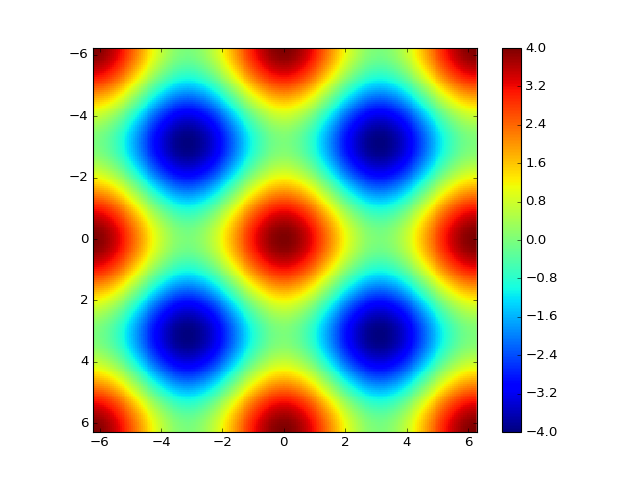

In [100]:
plt.figure()
plt.imshow(E_k,interpolation='None', extent=(min_k,max_k, max_k, min_k))
plt.colorbar()

In [135]:
from scipy.optimize import minimize

In [136]:
V=np.zeros((Nf,Nc,Nc))
e_k=np.random.random((Nf))

In [137]:
def error_hyb_fitting(parametrs,G0_K,matsubara,E_K):
    V,e_k=parametrs
    hyb_IJ=np.empty((matsubara.size,Nc,Nc),dtype=np.complex128)
    for k in xrange(matsubara.size):
        for i in xrange(Nc):
            for j in xrange(Nc): 
                hyb_IJ[k,i,j]=np.sum(np.conj(V[i,:])*V[j,:]/(matsubara[k]-e_k[:]))
                
    hyb_K=np.zeros((matsubara.size,KX.shape[0],KX.shape[1]),dtype=np.complex128)
    for k in xrange(matsubara.size):
        for i in xrange(Nc):
            hyb_K[k,:,:]=hyb_K[k,:,:]+fftshift(np.abs(fft2(hyb_IJ[k,i,:].reshape(L,L))))
            
    error=0        
    for i in xrange(matsubara.size):  
        error=error+np.sum(np.abs((G0_K[i,:,:]-(1j*matsubara[i]+mu-E_K-hyb_K[i,:,:]))**2))
    return error

In [140]:
start_parametrs=(V,e_k)

In [142]:
parametrs = minimize(error_hyb_fitting, start_parametrs, args=(G0_K,matsubara,E_K))

ValueError: could not broadcast input array from shape (4,4,4) into shape (4)